# Simple Graph for Kgraph statistics

This notebook demonstrates how one can generate a karstic network from scratch, using only a set of nodes (including their positions) and a set of edges connecting the nodes. From these data, the graph is generated, plotted and its statistical properties are computed.

Nov. 2018


In [1]:
import karstnet as kn

# Simple tree

We first define a dictionnary of nodes. Each node is defined by a key (here an integer ID number) and positions in 2D. The second structure is a list of edges. Each edge is a tuple containing a pair of nodes.  


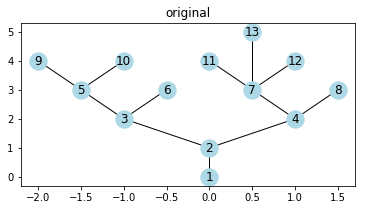

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd
--------------------------------------
               mean length = 1.231
                 cv length = 0.212
            length entropy = 0.448
                tortuosity = 1.000
       orientation entropy = 0.718
                      aspl = 3.128
                       cpd = 0.463
               mean degree = 1.846
                 cv degree = 0.595
 correlation vertex degree = -0.600
--------------------------------------
The mean degree is  1.8461538461538463


In [2]:
# The dictionary of nodes of the graph
nodes = {1 : (0, 0), 2 : (0, 1), 3 : (-1, 2), 4 : (1, 2),
         5 : (-1.5, 3), 6 : (-0.5, 3), 7 : (0.5, 3), 8 : (1.5, 3),
         9 : (-2, 4), 10 : (-1, 4), 11 : (0, 4), 12 : (1, 4), 13 : (0.5, 5)}

# The list of edges connecting the nodes
edges = [(1, 2), (2, 3), (2, 4), (3, 5), (3, 6), (4, 7), 
         (4, 8), (5, 9), (5, 10), (7, 11), (7, 12), (7, 13)]


# Creation of the KGraph object using karstnet
k = kn.KGraph(edges, nodes)

# Plot the graph in 2D for checking
k.plot2()

# Computes the statistics of the graph
results = k.characterize_graph( verbose = True )

# The results are stored in a dictionnary. To extract the statistics of 
# interest use the name of the statistics as key. For example:
print("The mean degree is ", results["mean degree"])

# Complete graph

Following the same idea as above, we construct below a complete graph: all nodes are connected to all nodes. Such a graph has no central point dominance, no variation in degrees, and its average shortest path length is 1. Let's check that this is correct.


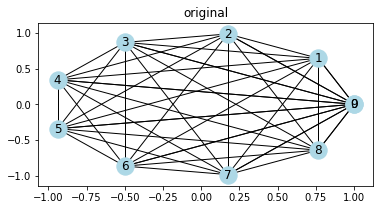

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd
--------------------------------------
               mean length = 1.386
                 cv length = 0.380
            length entropy = 0.751
                tortuosity = 1.000
       orientation entropy = 0.971
                      aspl = 1.000
                       cpd = 0.000
               mean degree = 9.000
                 cv degree = 0.000
 correlation vertex degree = 1.000
--------------------------------------


In [3]:
# Use numpy module for computing the positions of the nodes
import numpy as np

# Construct the nodes and edges
# Number of nodes
npt = 10
nodes = {}
edges = []

for i in range(npt):
    angle = 2 * np.pi * i / (npt - 1) 
    nodes[i] = (np.cos(angle), np.sin(angle))  

for i in range(npt):
    for j in range(npt):
        if i != j:
            edges.append((i, j))

# Creates the graph            
k = kn.KGraph( edges, nodes)

# Plot it for verification
k.plot2()

# And computes the statistics
r = k.characterize_graph( verbose=True )